# Partition Puzzle

Let’s take any number, such as 10. Divide it into some number of identical pieces, such as two 5s, and multiply them together: 5 × 5 = 25. Now, we could have divided 10 into three, four, five or six identical pieces and done the same. Here’s what happens to our product when we do so:

```
2 pieces: 5 × 5 = 25
3 pieces: 3.33 × 3.33 × 3.33 = 37.04
4 pieces: 2.5 × 2.5 × 2.5 × 2.5 = 39.06
5 pieces: 2 × 2 × 2 × 2 × 2 = 32
6 pieces: 1.67 × 1.67 × 1.67 × 1.67 × 1.67 × 1.67 = 21.43
```
You can see that the product increases, reaches what seems to be a maximum and then starts decreasing. Try doing the same with some other numbers such as 20 and 30. You’ll notice that the same thing happens in every case. This has nothing to do with the numbers themselves but is caused by a unique property of the number e.

a. See if you can figure out when the product reaches a maximum for a given number and what this has to do with e. If you’re stumped, click on the hint below.

b. For the number 10, the largest product (39.06) is about 5.5% larger than the next largest (37.04). Without calculating the actual difference, can you guess which number less than 100 has the smallest percentage difference between the largest product and the next largest? Why should this be?

c. Can you explain why e arises in this apparently simple problem?

Link to article: https://www.quantamagazine.org/where-transcendental-numbers-hide-in-everyday-math-20211027/

<ipython-input-33-966bd2f934d8>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  res = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10,4))


,A,p
0,5,1.839397
1,6,2.207277
2,7,2.575156
3,8,2.943036
4,9,3.310915
5,10,3.678794
6,11,4.046674
7,12,4.414553
8,13,4.782433
9,14,5.150312


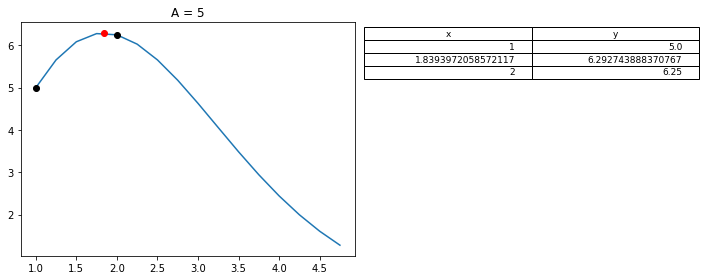

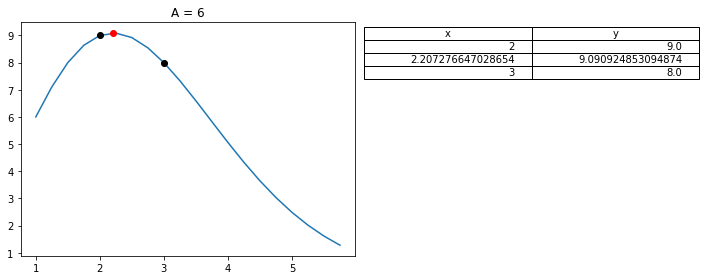

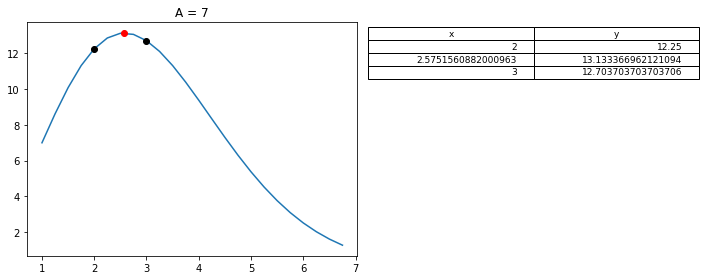

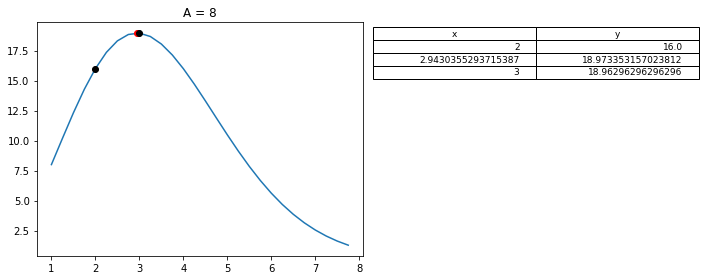

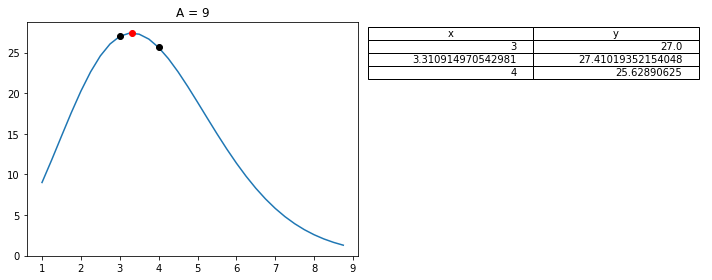

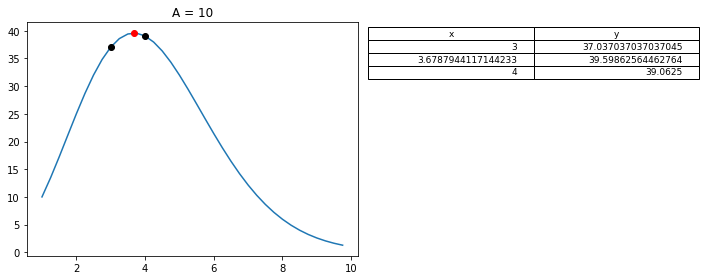

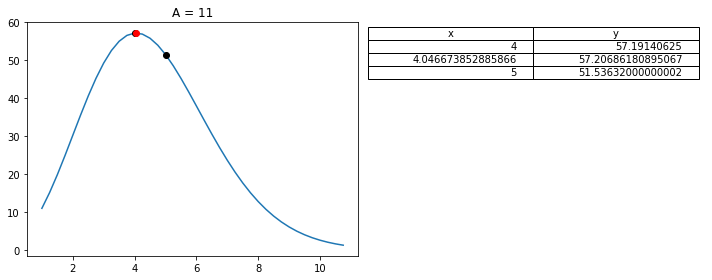

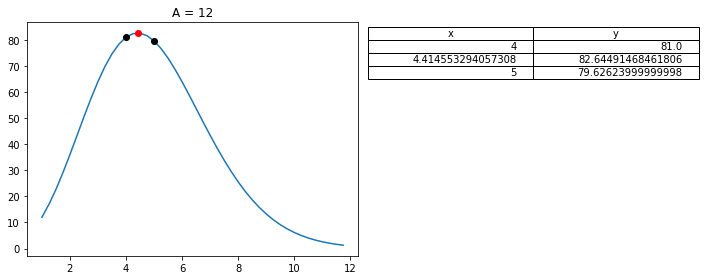

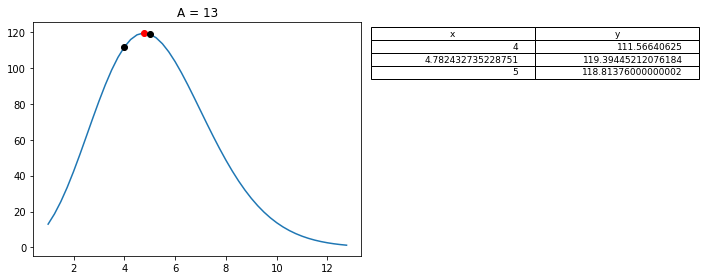

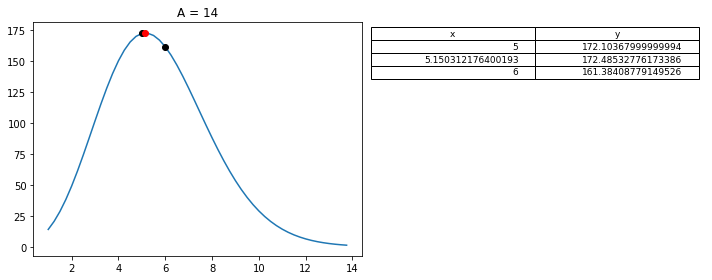

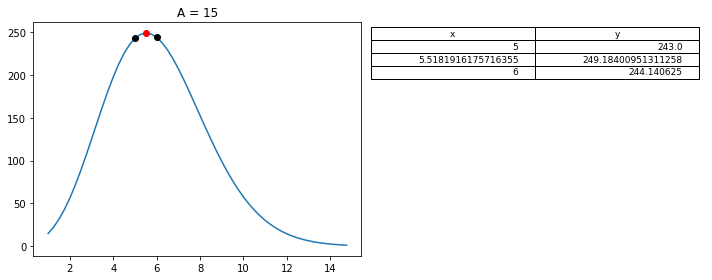

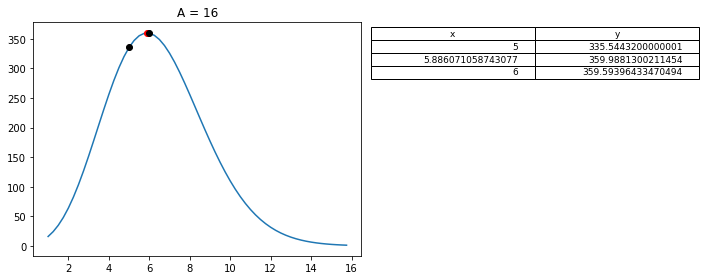

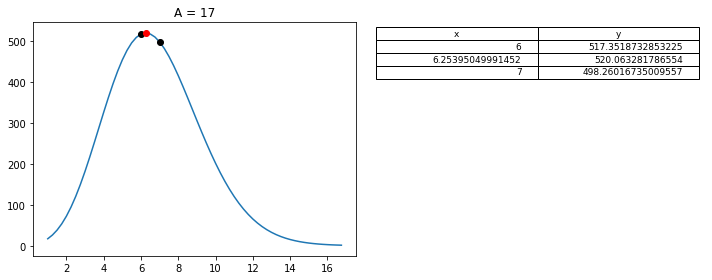

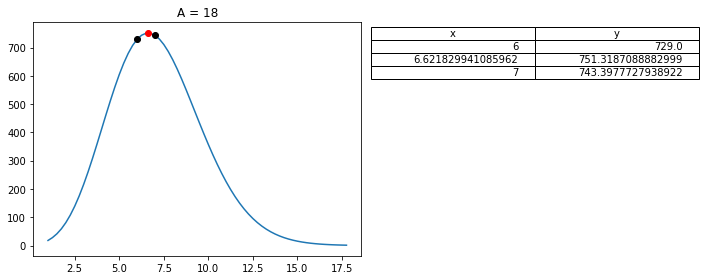

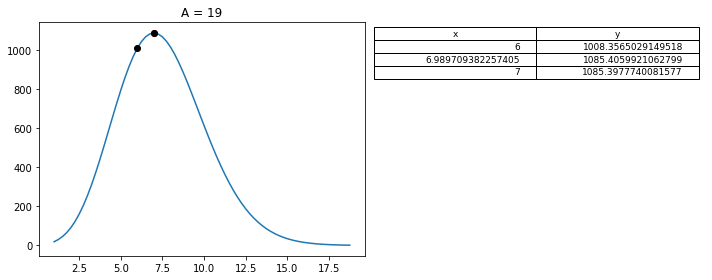

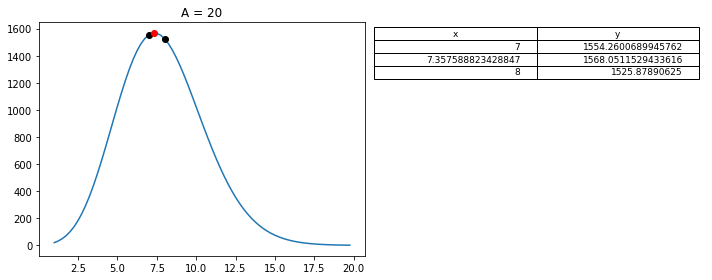

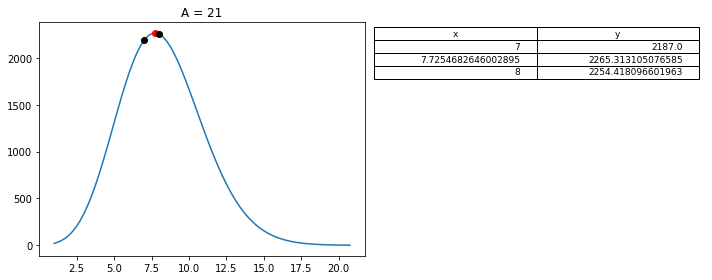

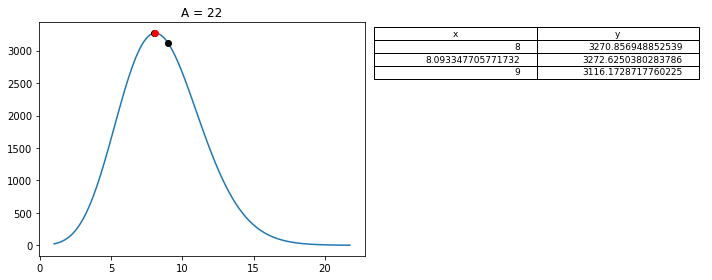

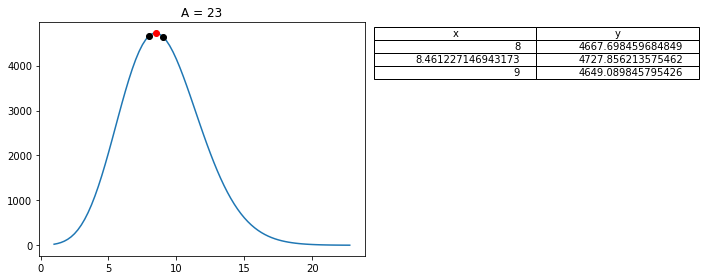

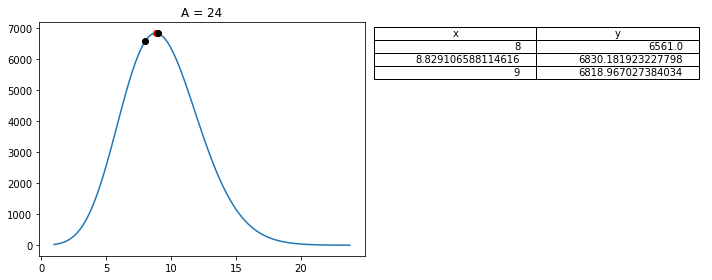

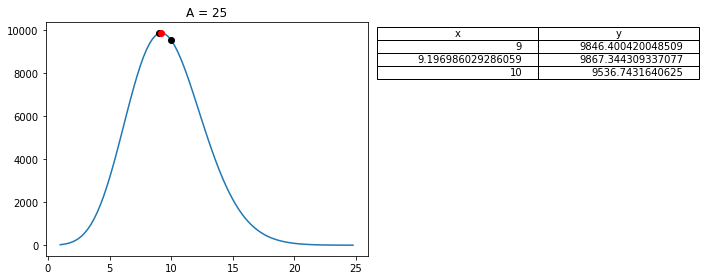

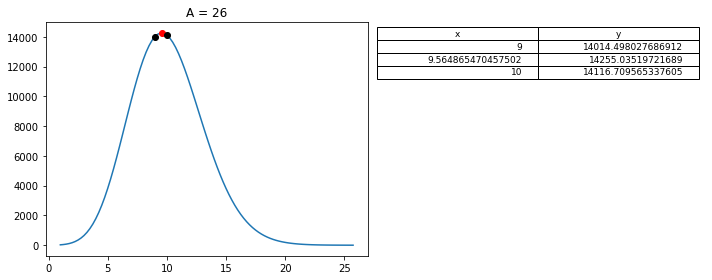

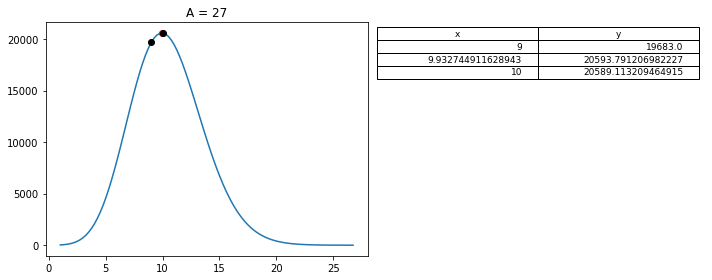

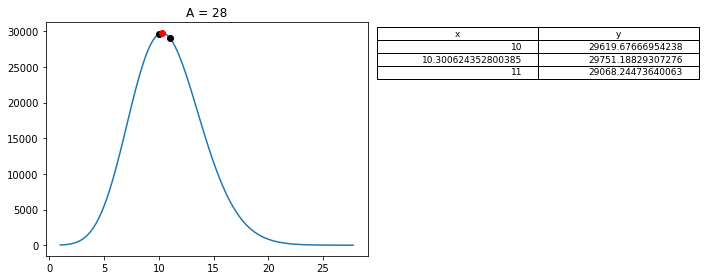

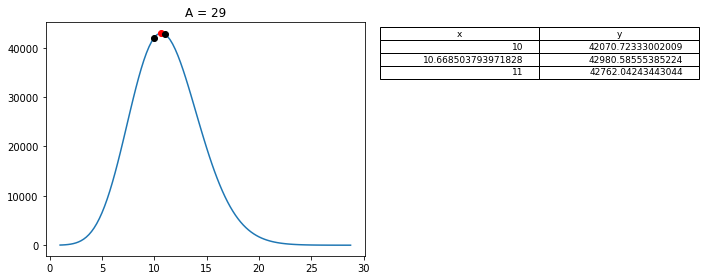

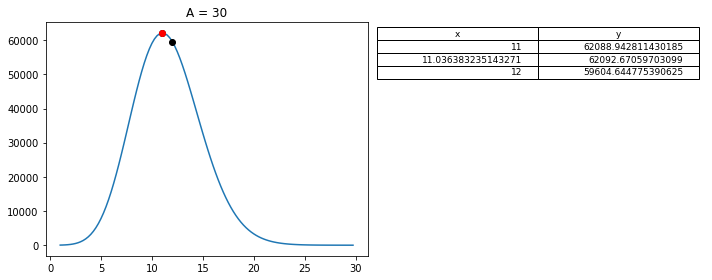

In [33]:
import pandas
import numpy as np
import math
import matplotlib.pyplot as plt
# from IPython.core.debugger import set_trace
%matplotlib inline

def f1(a, x):
    return (a/x)**x

def f2(a):
    return a/np.e

A = np.arange(5, 31, 1)
increment = 0.25
p = f2(A)

plots = []

for a in A:
    x = np.arange(1, a, increment)
    y = f1(a, x)
    res = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10,4))
    
    plots.append(res)
    
    fig, (ax1, ax2) = res    
    ax1.plot(x, y)
    ax1.title.set_text('A = %d' % a)
    p1 = f2(a)
    x1 = list(np.arange(math.floor(p1), math.floor(p1) + 2)) + [p1]
    x1.sort()
    y1 = f1(a,x1)
    zipped = zip(x1, y1)
    ax2.table(cellText=list(zipped), colLabels=['x', 'y'], loc='best')
    [ ax2.spines[val].set_visible(False) for val in  ['top', 'left', 'bottom', 'right'] ]
    ax2.set_xticklabels([])    
    ax2.set_xticks([])
    ax2.set_yticklabels([])
    ax2.set_yticks([])
    
    for (x, y) in zip(x1, y1):
#         print('f')
        if x == p1:
            ax1.plot(x, y, marker='o', color='red')
        else:
            ax1.plot(x, y, marker='o', color='black')

df = pandas.DataFrame({ 
    'A': A, 
    'p': p 
#     'Plot': plots 
})
df